In [66]:
# 1 TASK (Вероятность распределения и уровень значимости)

# Step 1: Import Required Libraries
# Import the scipy.stats module for statistical functions
import scipy.stats as stats
import numpy as pd
from scipy.stats import norm

In [67]:
# Step 2: Define Parameters of the Normal Distribution
# Mean and standard deviation of espresso volume
mu = 30      # average volume in ml
sigma = 1    # standard deviation in ml

# Threshold for unacceptable volume
threshold = 29

# Significance level
alpha = 0.05

In [68]:
# Step 3: Calculate the Probability of Volume < 29 ml
# Calculate cumulative probability for volume less than 29 ml
probability = stats.norm.cdf(threshold, loc=mu, scale=sigma)

# Display the result
print(f"Probability that a portion is less than 29 ml: {probability:.4f}")

Probability that a portion is less than 29 ml: 0.1587


In [69]:
# Step 4: Compare with Significance Level
# Check if the probability exceeds the significance level
if probability > alpha:
    print("The probability is greater than the significance level.")
    print("Conclusion: The cafe's claim may not hold.")
else:
    print("The probability is within acceptable limits.")
    print("Conclusion: The cafe's claim holds.")

The probability is greater than the significance level.
Conclusion: The cafe's claim may not hold.


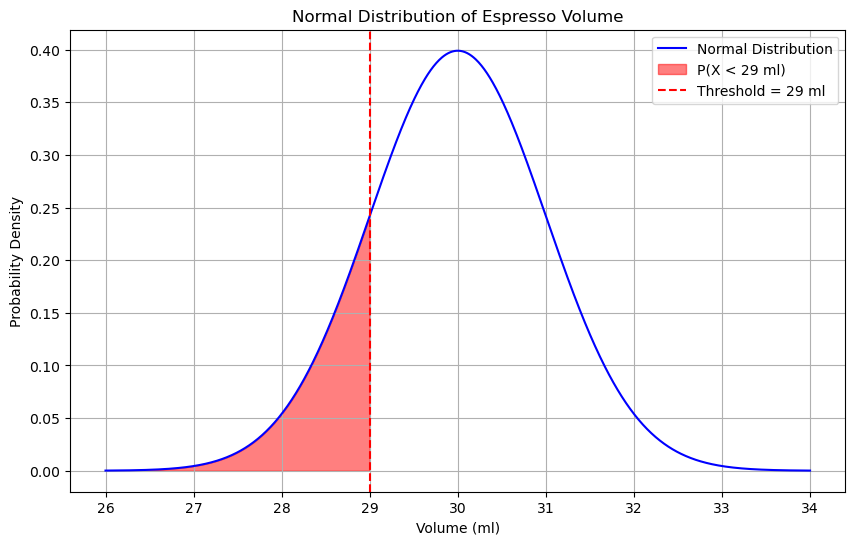

In [70]:
# Step 5: Visualize the Distribution
import matplotlib.pyplot as plt

# Generate x values for the plot
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Shade the area under the curve for x < threshold
x_shade = np.linspace(mu - 4*sigma, threshold, 1000)
y_shade = stats.norm.pdf(x_shade, mu, sigma)
plt.fill_between(x_shade, y_shade, color='red', alpha=0.5, label='P(X < 29 ml)')

# Add labels and legend
plt.title('Normal Distribution of Espresso Volume')
plt.xlabel('Volume (ml)')
plt.ylabel('Probability Density')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold = 29 ml')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# 2 TASK (Вероятность распределения и уровень значимости)

# Step 1: Define the Distribution Parameters

mu = 18       # mean reduction for standard drugs
sigma = 4     # standard deviation
threshold = 22  # observed reduction with new drug
alpha = 0.01  # significance level

In [65]:
# Step 2: Calculate the Probability

from scipy.stats import norm

# P(X >= 22)
probability = 1 - norm.cdf(threshold, loc=mu, scale=sigma)
print(f"Probability of observing a reduction >= 22 mg/dL: {probability:.4f}")

Probability of observing a reduction >= 22 mg/dL: 0.1587


In [73]:
# Step 3: Compare with Significance Level

if probability < alpha:
    print("Conclusion: The observed reduction is statistically significant.")
else:
    print("Conclusion: The observed reduction could be due to chance.")

Conclusion: The observed reduction could be due to chance.


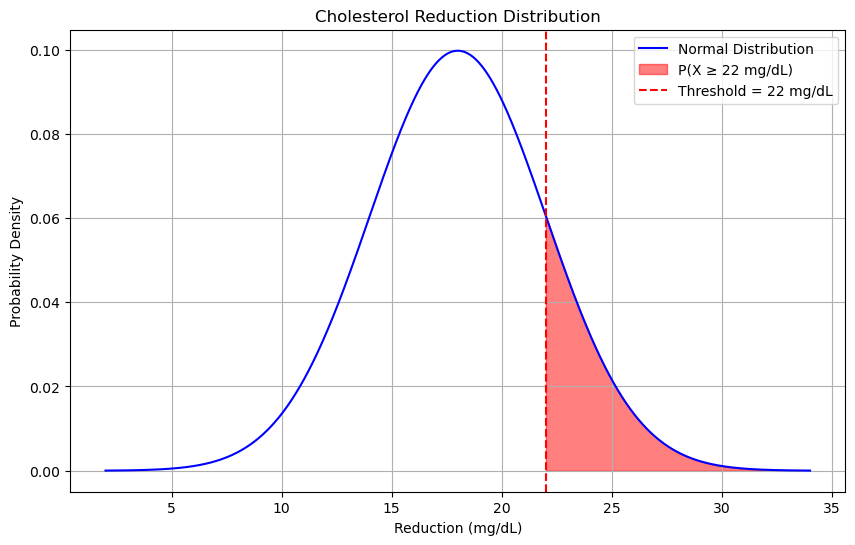

In [75]:
# Step 4: Visualize the Distribution

# Generate x values for the plot
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Shade the area for x >= 22
x_shade = np.linspace(threshold, mu + 4*sigma, 1000)
y_shade = norm.pdf(x_shade, mu, sigma)
plt.fill_between(x_shade, y_shade, color='red', alpha=0.5, label='P(X ≥ 22 mg/dL)')

# Add vertical line at threshold
plt.axvline(threshold, color='red', linestyle='--', label='Threshold = 22 mg/dL')

# Add labels and legend
plt.title('Cholesterol Reduction Distribution')
plt.xlabel('Reduction (mg/dL)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# 3 TASK (Центральная предельная теорема)

# Step 1: Import Required Libraries
# Step 2: Generate Random Data

# Set seed for reproducibility
np.random.seed(42)

# Generate 10,000 values from each distribution
normal_data = np.random.normal(loc=0, scale=1, size=10000)
uniform_data = np.random.uniform(low=0, high=1, size=10000)
exponential_data = np.random.exponential(scale=1, size=10000)

In [78]:
# Step 3: Define a Function to Analyze and Visualize

def analyze_distribution(data, title):
    # Calculate overall mean
    overall_mean = np.mean(data)

    # Draw a random sample of 300 values
    sample = np.random.choice(data, size=300, replace=False)
    sample_mean = np.mean(sample)

    # Plot histogram
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(sample, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{title} - Sample Histogram\nSample Mean: {sample_mean:.4f}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(sample, dist="norm", plot=plt)
    plt.title(f'{title} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

    return overall_mean, sample_mean

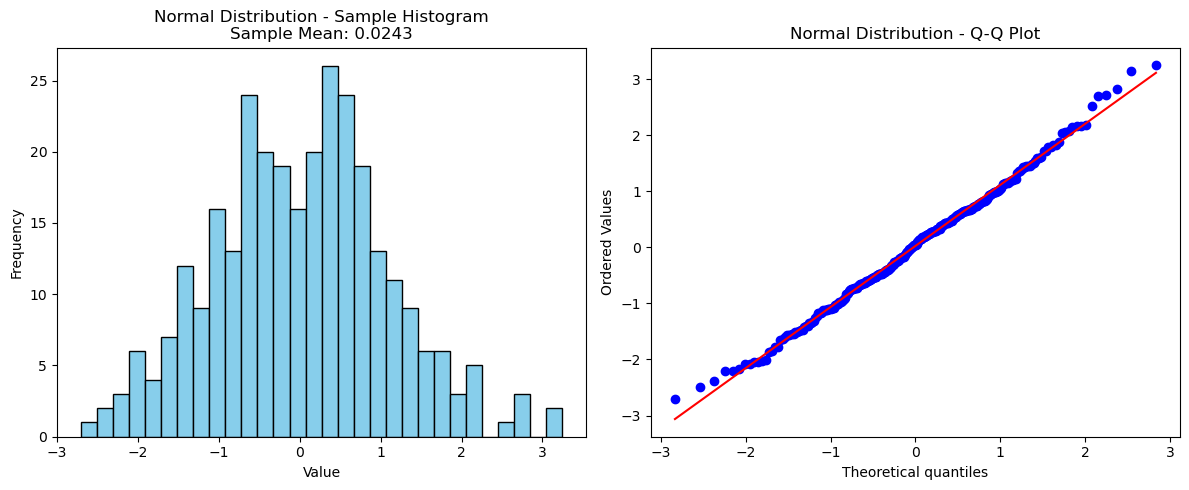

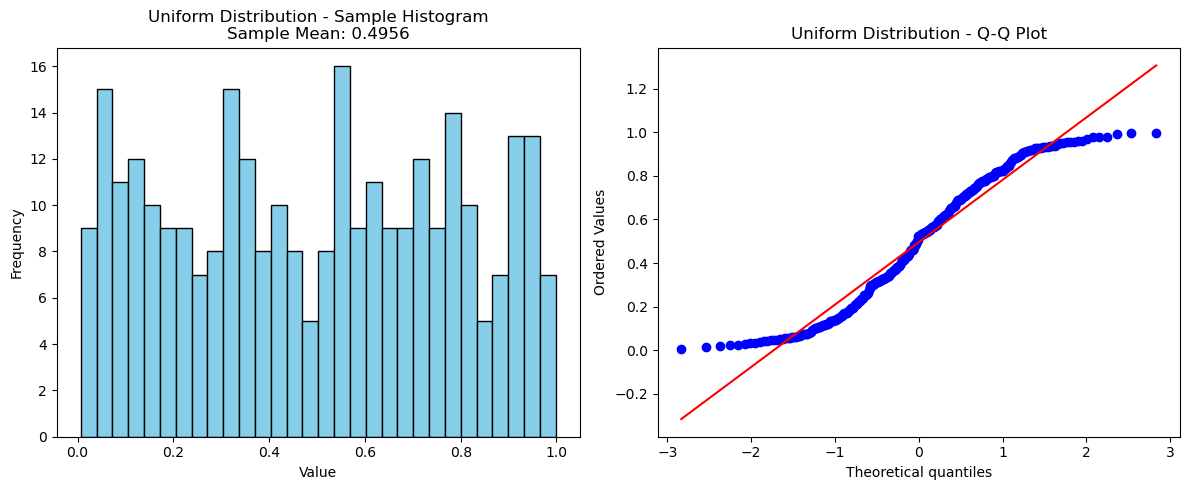

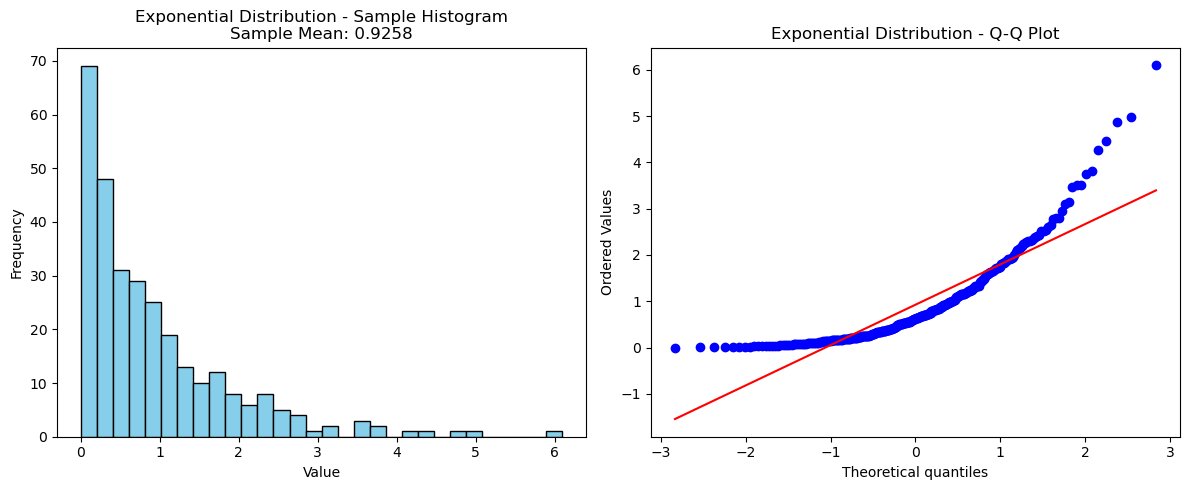

In [79]:
# Step 4: Apply the Function to Each Distribution

# Analyze normal distribution
normal_mean, normal_sample_mean = analyze_distribution(normal_data, "Normal Distribution")

# Analyze uniform distribution
uniform_mean, uniform_sample_mean = analyze_distribution(uniform_data, "Uniform Distribution")

# Analyze exponential distribution
exponential_mean, exponential_sample_mean = analyze_distribution(exponential_data, "Exponential Distribution")

In [80]:
# Step 5: Print Summary

print(f"Normal Distribution - Overall Mean: {normal_mean:.4f}, Sample Mean: {normal_sample_mean:.4f}")
print(f"Uniform Distribution - Overall Mean: {uniform_mean:.4f}, Sample Mean: {uniform_sample_mean:.4f}")
print(f"Exponential Distribution - Overall Mean: {exponential_mean:.4f}, Sample Mean: {exponential_sample_mean:.4f}")

Normal Distribution - Overall Mean: -0.0021, Sample Mean: 0.0243
Uniform Distribution - Overall Mean: 0.5071, Sample Mean: 0.4956
Exponential Distribution - Overall Mean: 0.9868, Sample Mean: 0.9258


In [81]:
# 4 TASK (Центральная предельная теорема)

# Step 1: Define known parameters

population_mean = 30      # Mean commute time in minutes
sample_std_dev = 10       # Standard deviation of the sample
sample_size = 50          # Number of residents in the sample

In [83]:
# Step 2: Calculate standard error of the mean

standard_error = sample_std_dev / np.sqrt(sample_size)

In [84]:
# Step 3: Define a range of sample means around the population mean

x = np.linspace(population_mean - 4*standard_error, population_mean + 4*standard_error, 1000)
y = norm.pdf(x, loc=population_mean, scale=standard_error)

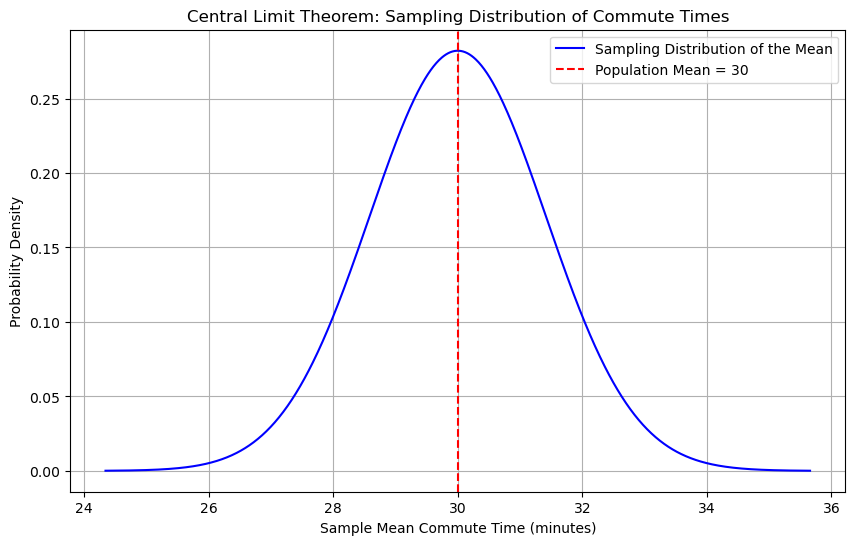

In [85]:
# Step 4: Plot the sampling distribution

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sampling Distribution of the Mean', color='blue')
plt.axvline(population_mean, color='red', linestyle='--', label='Population Mean = 30')
plt.title('Central Limit Theorem: Sampling Distribution of Commute Times')
plt.xlabel('Sample Mean Commute Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Step 5: Calculate probability that sample mean is within ±1 minute of population mean

lower_bound = population_mean - 1
upper_bound = population_mean + 1
probability = norm.cdf(upper_bound, loc=population_mean, scale=standard_error) - norm.cdf(lower_bound, loc=population_mean, scale=standard_error)

print(f"Probability that the sample mean is within ±1 minute of the population mean: {probability:.4f}")

Probability that the sample mean is within ±1 minute of the population mean: 0.5205
